# Happy Customers Project

## Background:
We are one of the fastest growing startups in the logistics and delivery domain. We work with several partners and make on-demand delivery to our customers. During the COVID-19 pandemic, we are facing several different challenges and everyday we are trying to address these challenges.

We thrive on making our customers happy. As a growing startup, with a global expansion strategy we know that we need to make our customers happy and the only way to do that is to measure how happy each customer is. If we can predict what makes our customers happy or unhappy, we can then take necessary actions.

Getting feedback from customers is not easy either, but we do our best to get constant feedback from our customers. This is a crucial function to improve our operations across all levels.

We recently did a survey to a select customer cohort. You are presented with a subset of this data. We will be using the remaining data as a private test set.

## Data Description:
Attributes X1 to X6 indicate the responses for each question and have values from 1 to 5 where the smaller number indicates less and the higher number indicates more towards the answer.

* <code>X1</code> - my order was delivered on time <br>
* <code>X2</code> - contents of my order was as I expected <br>
* <code>X3</code> - I ordered everything I wanted to order <br>
* <code>X4</code> - I paid a good price for my order <br>
* <code>X5</code> - I am satisfied with my courier <br>
* <code>X6</code> - the app makes ordering easy for me <br>

<code>Y</code> - target attribute (Y) with values indicating 0 (unhappy) and 1 (happy) customers


## Goal:
Predict if a customer is happy or not based on the answers they give to questions asked. Additionally, learn which features significantly affect customer happiness using feature selection.

<font size="4"><b>Importing Modules and Data</b></font> 

In [1]:
import pandas as pd
import numpy as np

# Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

# Classification algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier

# Model evaluation metrics
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

# Feature Selection
from sklearn.feature_selection import SelectKBest, chi2, RFE

In [2]:
feature_dict = {'X1': "The order was delivered on time" ,'X2': "Contents of the order were as I expected", 
                'X3': "Ordered everything they wanted to order", 'X4': "Good price was paid for the order", 
                'X5': "Satisfied with the order", 'X6': "The app made ordering easy"}

df = pd.read_csv("dataset.csv", index_col=False)

print(np.shape(df))
df.head()

(126, 7)


,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       126 non-null    int64
 1   X1      126 non-null    int64
 2   X2      126 non-null    int64
 3   X3      126 non-null    int64
 4   X4      126 non-null    int64
 5   X5      126 non-null    int64
 6   X6      126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB


The dataset contains 126 examples with no null values. All the features are integer datatype

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Y,126.0,0.547619,0.499714,0.0,0.0,1.0,1.0,1.0
X1,126.0,4.333333,0.800000,1.0,4.0,5.0,5.0,5.0
X2,126.0,2.531746,1.114892,1.0,2.0,3.0,3.0,5.0
X3,126.0,3.309524,1.023440,1.0,3.0,3.0,4.0,5.0
X4,126.0,3.746032,0.875776,1.0,3.0,4.0,4.0,5.0
X5,126.0,3.650794,1.147641,1.0,3.0,4.0,4.0,5.0
X6,126.0,4.253968,0.809311,1.0,4.0,4.0,5.0,5.0


<font size="4"><b>Data Visualization</b></font> 

<AxesSubplot:>

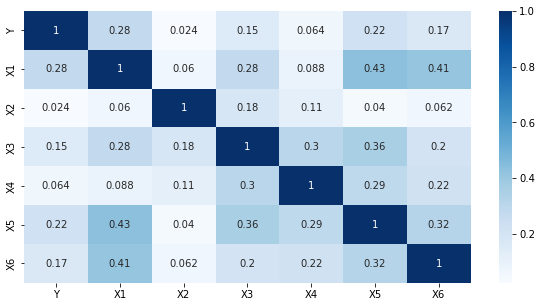

In [5]:
# Creating a correlation matrix to check if there are highly correlated features
fig, ax = plt.subplots(figsize=(10, 5))
correlation_matrix = df.corr().abs()
sns.heatmap(correlation_matrix, annot=True, cmap="Blues")

From the correlation matrix above, we see that there are no highly correlated features in the dataset. X1 (The order was delivered on time) is mildly correlated with X5 (Satisfied with the order)  and X6 (The app made ordering easy). However, the value is not large enough to drop the columns and we cannot use one of these columns to predict another column in the dataset.

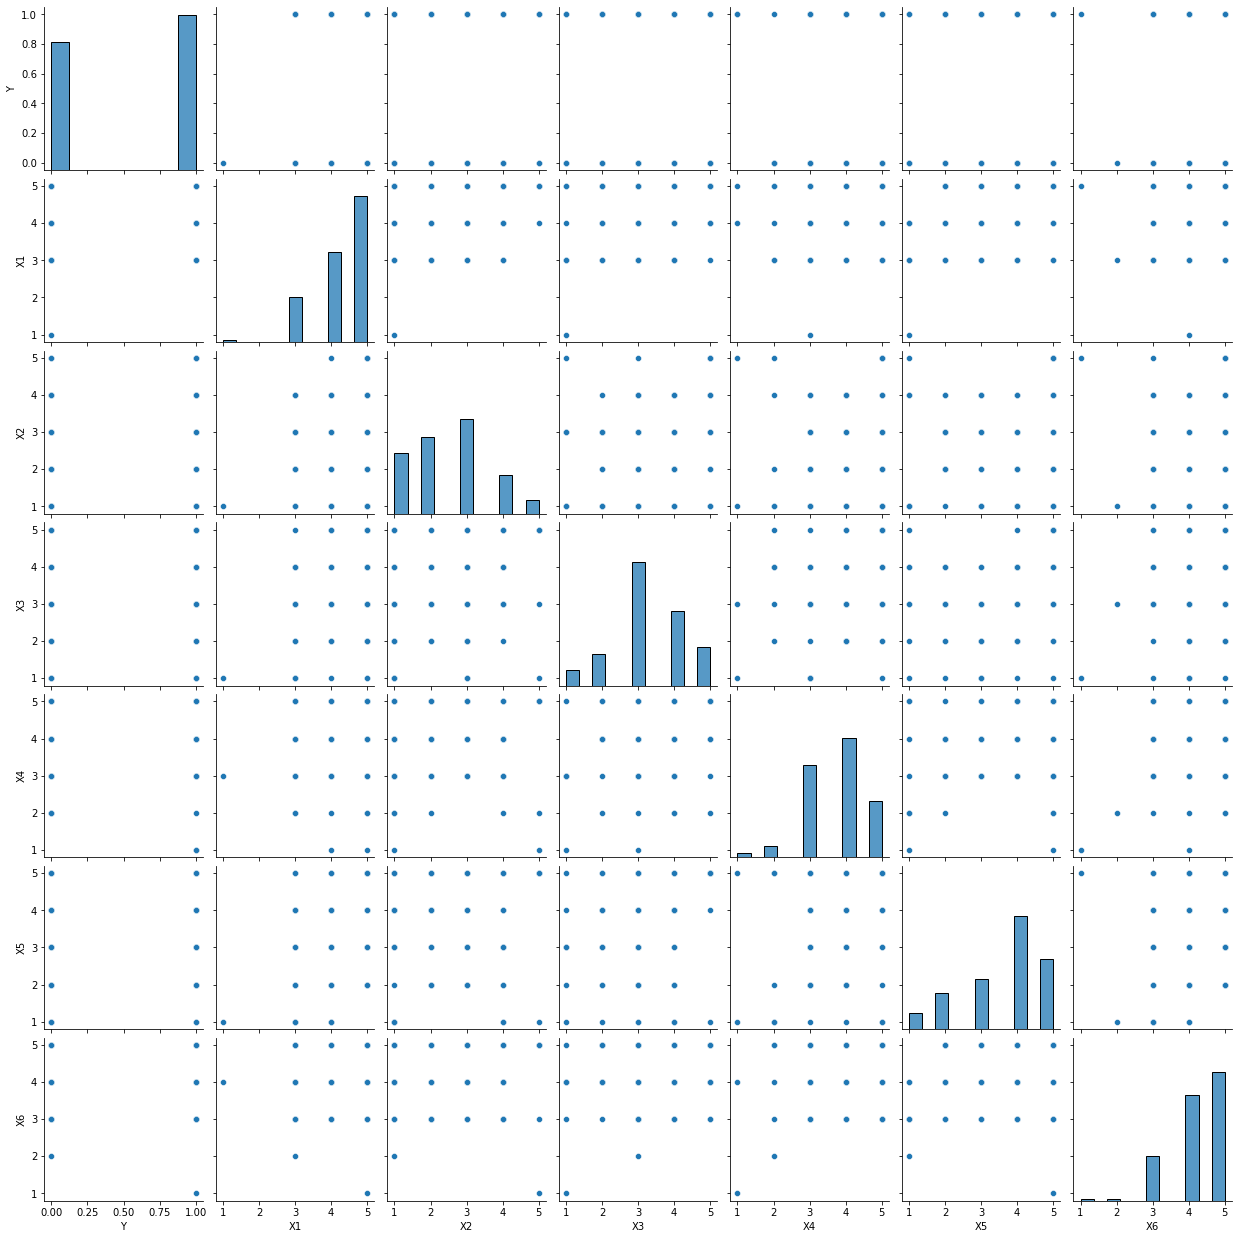

In [6]:
sns.pairplot(df)

The pairplot shows the data distribution of the dataset.

<font size="4"><b>Data Preparation</b></font> 

The data is split into 70% training and 30% testing to ensure the model does not overfit.

In [7]:
target = df['Y']
data = df.drop(['Y'], axis = 1)

# Split the data into traing and test datasets
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=42)
print("Size of the training dataset: ", X_train.shape)
print("Size of the test dataset: ", X_test.shape)
print("Total training dataset labels: ", y_train.shape)
print("Total test dataset labels: ", y_test.shape)
print("\n")

print("The data contains {} examples belonging to class 0 (unhappy) and {} examples belonging to class 1 (happy)."
      .format(np.bincount(target)[0], np.bincount(target)[1]))
print("Trainig data contains {} examples belonging to class 0 (unhappy) and {} examples belonging to class 1 (happy)."
      .format(np.bincount(y_train)[0], np.bincount(y_train)[1]))
print("Testing data contains {} examples belonging to class 0 (unhappy) and {} examples belonging to class 1 (happy)."
      .format(np.bincount(y_test)[0], np.bincount(y_test)[1]))

Size of the training dataset:  (88, 6)
Size of the test dataset:  (38, 6)
Total training dataset labels:  (88,)
Total test dataset labels:  (38,)


The data contains 57 examples belonging to class 0 (unhappy) and 69 examples belonging to class 1 (happy).
Trainig data contains 37 examples belonging to class 0 (unhappy) and 51 examples belonging to class 1 (happy).
Testing data contains 20 examples belonging to class 0 (unhappy) and 18 examples belonging to class 1 (happy).


The training data is marginally imbalanced as it contains more examples belonging to class 1. This is representative of the original data. Test data contains roughly the same number of examples belonging to both the classes. 

In [8]:
# Helper function to provide evaluation results
def eval_results(actual, predictions, model):
    # F1 Score
    print("F1 Score: ", f1_score(actual, predictions))
    
    # Accuracy
    print("Accuracy of the model on test data : ", accuracy_score(actual, predictions))
    print(np.bincount(predictions))
    
    # Visualize the evaluation report
    print(classification_report(actual, predictions))
    
    # Plot the confusion matrix
    cm = confusion_matrix(actual, predictions, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()
    plt.show()
    

<font size="4"><b>Training Different Models</b></font>

<font size="4"> 1. Decision Trees</font> 

F1 Score:  0.5
Accuracy of the model on test data :  0.47368421052631576
[16 22]
              precision    recall  f1-score   support

           0       0.50      0.40      0.44        20
           1       0.45      0.56      0.50        18

    accuracy                           0.47        38
   macro avg       0.48      0.48      0.47        38
weighted avg       0.48      0.47      0.47        38



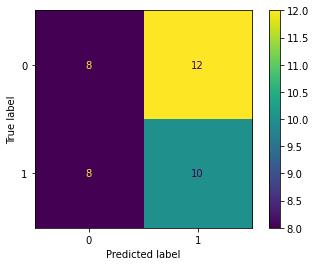

In [9]:
# Decision Trees: They are sensitive to data
dec_tree = DecisionTreeClassifier(random_state=42)
dec_tree.fit(X_train, y_train)

y_pred_dec = dec_tree.predict(X_test)

eval_results(y_test, y_pred_dec, dec_tree)

<font size="4">Decision Tree Hyperparameter Tuning</font> 

In [10]:
# Decision Trees Hyperparameters
criterion = ['gini', 'entropy']
splitter = ['best', 'random']

acc_score_dec = 0
hyper_parameters_dec = {'criterion': "", 'splitter': "", 'max_depth': ""}

# Test different models with different combinations of hyperparameters and select the hyperparameters with
# maximum accuracy
for c in criterion:
    for s in splitter:
        for d in range(3, 10):
            dec_tree = DecisionTreeClassifier(criterion=c, splitter=s, max_depth=d, random_state=42)
            dec_tree.fit(X_train, y_train)

            y_pred_dec = dec_tree.predict(X_test)

            if accuracy_score(y_test, y_pred_dec) > acc_score_dec:
                acc_score_dec = accuracy_score(y_test, y_pred_dec)
                hyper_parameters_dec.update({'criterion': c, 'splitter': s, 'max_depth': d})

print("The optimum hyperparameters for the decision tree model is: ", hyper_parameters_dec)


The optimum hyperparameters for the decision tree model is:  {'criterion': 'gini', 'splitter': 'random', 'max_depth': 4}


F1 Score:  0.7083333333333334
Accuracy of the model on test data :  0.631578947368421
[ 8 30]
              precision    recall  f1-score   support

           0       0.88      0.35      0.50        20
           1       0.57      0.94      0.71        18

    accuracy                           0.63        38
   macro avg       0.72      0.65      0.60        38
weighted avg       0.73      0.63      0.60        38



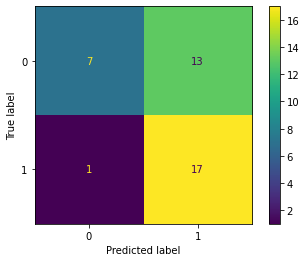

In [11]:
# Decision Tree model with optimum hyperparameters
dec_tree = DecisionTreeClassifier(criterion='gini', splitter='random', max_depth=4, random_state=42)
dec_tree.fit(X_train, y_train)

y_pred_dec = dec_tree.predict(X_test)

eval_results(y_test, y_pred_dec, dec_tree)

The **decision tree model** has a **accuracy** of **63%** on test data. However, the final predictons contains large number of false positives (For a large number of datapoints belonging to class 0, the model predicts that they belong to class 1) indicating the model's bias towards class 1.

<font size="4"> 2. Random Forest</font> 

F1 Score:  0.717948717948718
Accuracy of the model on test data :  0.7105263157894737
[17 21]
              precision    recall  f1-score   support

           0       0.76      0.65      0.70        20
           1       0.67      0.78      0.72        18

    accuracy                           0.71        38
   macro avg       0.72      0.71      0.71        38
weighted avg       0.72      0.71      0.71        38



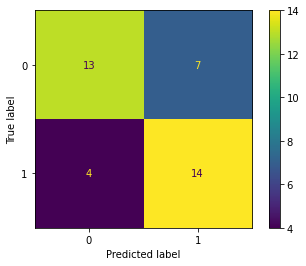

'\n# Random Forest Hyperparameters\ncriterion = [\'gini\', \'entropy\']\nmax_features = [\'log2\', \'sqrt\']\n\nacc_score_rfc = 0\nhyper_parameters_rfc = {\'criterion\': "", \'max_features\': "", \'max_depth\': 0, \'n_estimators\':0}\n\n# Test different models with different combinations of hyperparameters and record the corresponding hyperparameters with\n# maximum accuracy\nfor c in criterion:\n    for m in max_features:\n        for d in range(1, 20):\n            for n in range(1, 20):\n                rfc = RandomForestClassifier(criterion=c, max_features=m, max_depth=d, n_estimators=n, random_state=42)\n                rfc = rfc.fit(X_train, y_train)\n\n                y_predict_rfc = rfc.predict(X_test)\n\n                if accuracy_score(y_test, y_predict_rfc) > acc_score_rfc:\n                    acc_score_dec = accuracy_score(y_test, y_predict_rfc)\n                    hyper_parameters_rfc.update({\'criterion\': c, \'max_features\': m, \'max_depth\': d,\n                    

In [12]:
rfc = RandomForestClassifier(n_estimators=6, random_state=42)
rfc.fit(X_train, y_train)

y_predict_rfc = rfc.predict(X_test)

eval_results(y_test, y_predict_rfc, rfc)

"""
# Random Forest Hyperparameters
criterion = ['gini', 'entropy']
max_features = ['log2', 'sqrt']

acc_score_rfc = 0
hyper_parameters_rfc = {'criterion': "", 'max_features': "", 'max_depth': 0, 'n_estimators':0}

# Test different models with different combinations of hyperparameters and record the corresponding hyperparameters with
# maximum accuracy
for c in criterion:
    for m in max_features:
        for d in range(1, 20):
            for n in range(1, 20):
                rfc = RandomForestClassifier(criterion=c, max_features=m, max_depth=d, n_estimators=n, random_state=42)
                rfc = rfc.fit(X_train, y_train)

                y_predict_rfc = rfc.predict(X_test)

                if accuracy_score(y_test, y_predict_rfc) > acc_score_rfc:
                    acc_score_dec = accuracy_score(y_test, y_predict_rfc)
                    hyper_parameters_rfc.update({'criterion': c, 'max_features': m, 'max_depth': d,
                                                'n_estimators': n})

print("The optimum hyperparameters for the random forest model is: ", hyper_parameters_rfc)

rfc = RandomForestClassifier(criterion='gini', max_features='sqrt', max_depth=6, n_estimators=300, random_state=42)
rfc.fit(X_train, y_train)

y_predict_rfc = rfc.predict(X_test)

eval_results(y_test, y_predict_rfc, rfc)
"""


The **accuracy** of the **Random Forest** model is **71%**. The maximum accuracy is achieved with default hyperparameters, hence there is no hyperparameters tuning. This model still makes some misclassifications, but the model is much better in prediciting examples belonging to both classes.  

<font size="4"> 3. Support Vector Machines (SVM)</font> 

F1 Score:  0.5957446808510638
Accuracy of the model on test data :  0.5
[ 9 29]
              precision    recall  f1-score   support

           0       0.56      0.25      0.34        20
           1       0.48      0.78      0.60        18

    accuracy                           0.50        38
   macro avg       0.52      0.51      0.47        38
weighted avg       0.52      0.50      0.46        38



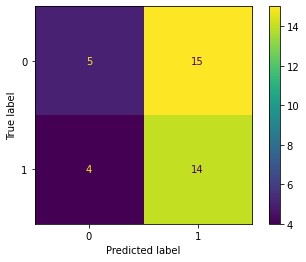

In [13]:
svm_model = svm.SVC(random_state=42)
svm_model.fit(X_train, y_train)

y_predict_svm = svm_model.predict(X_test)

eval_results(y_test, y_predict_svm, svm_model)

<font size="4">SVM Hyperparameter Tuning</font> 

In [14]:
# SVM Hyperparameters
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
degree = [1, 2, 3, 4]
gamma = ['scale', 'auto']

acc_score_svm = 0
hyper_parameters_svm = {'kernel': "", 'degree': "", 'gamma': ""}

# Test different models with different combinations of hyperparameters and select the hyperparameters with
# maximum accuracy
for k in kernel:
    for d in degree:
        for g in gamma:
            svm_model = svm.SVC(kernel=k, degree=d, gamma=g, random_state=42)
            svm_model.fit(X_train, y_train)

            y_predict_svm = svm_model.predict(X_test)

            if accuracy_score(y_test, y_predict_svm) > acc_score_svm:
                acc_score_svm = accuracy_score(y_test, y_predict_svm)
                hyper_parameters_svm.update({'kernel': k, 'degree': d, 'gamma': g})

print("The optimum hyperparameters for the SVM model is: ", hyper_parameters_svm)

The optimum hyperparameters for the SVM model is:  {'kernel': 'poly', 'degree': 3, 'gamma': 'scale'}


F1 Score:  0.6666666666666666
Accuracy of the model on test data :  0.6842105263157895
[20 18]
              precision    recall  f1-score   support

           0       0.70      0.70      0.70        20
           1       0.67      0.67      0.67        18

    accuracy                           0.68        38
   macro avg       0.68      0.68      0.68        38
weighted avg       0.68      0.68      0.68        38



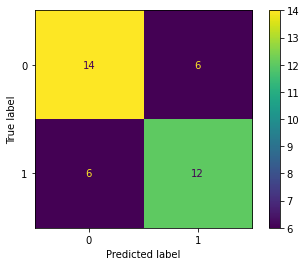

In [15]:
svm_model = svm.SVC(kernel='poly', degree=3, gamma='scale', random_state=42)
svm_model.fit(X_train, y_train)

y_predict_svm = svm_model.predict(X_test)

eval_results(y_test, y_predict_svm, svm_model)

The **accuracy** of the **SVM** model is **68%**. This model still makes some misclassifications, but the predictions are more balanced. The model is much better at prediciting examples belonging to both classes.

<font size="4"> 4. K Nearest Neighbours (KNN)</font>

{'k-neighbours': 20, 'accuracy': 0.5789473684210527}
F1 Score:  0.6799999999999999
Accuracy of the model on test data :  0.5789473684210527
[ 6 32]
              precision    recall  f1-score   support

           0       0.83      0.25      0.38        20
           1       0.53      0.94      0.68        18

    accuracy                           0.58        38
   macro avg       0.68      0.60      0.53        38
weighted avg       0.69      0.58      0.52        38



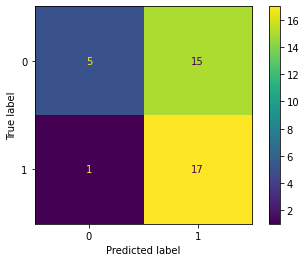

In [16]:

temp_result = {'k-neighbours': 0, 'accuracy': 0}

for k in range(1, 50):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    
    y_predict_knn = knn_model.predict(X_test)
    
    if accuracy_score(y_test, y_predict_knn) > temp_result['accuracy']:
        temp_result.update({'k-neighbours': k, 'accuracy': accuracy_score(y_test, y_predict_knn)})
    

print(temp_result)


# Recreate the KNN model with n_neighbors = 20 
knn_model = KNeighborsClassifier(n_neighbors=20)
knn_model.fit(X_train, y_train)

y_predict_knn = knn_model.predict(X_test)
eval_results(y_test, y_predict_knn, knn_model)

<font size="4">KNN Hyperparameter Tuning</font> 

In [17]:
# KNN Hyperparameters list
weights = ['uniform', 'distance']
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
power = [1, 2]


acc_score_knn = 0
hyper_parameters_knn = {'n_neighbors': 0, 'weights': 0, 'algorithm': "", 'leaf_size': 0, 'p':0}

for n in range(1,20):
    for w in weights:
        for a in algorithm:
            for l in range(1,30):
                for p in power:
                    knn_model = KNeighborsClassifier(n_neighbors=n, weights=w, algorithm=a, leaf_size=l, p=p)
                    knn_model = knn_model.fit(X_train, y_train)

                    y_predict_knn = knn_model.predict(X_test)
                    
                    if accuracy_score(y_test, y_predict_knn) > acc_score_knn:
                        acc_score_svm = accuracy_score(y_test, y_predict_svm)
                        hyper_parameters_knn.update({'n_neighbors': n, 'weights': w, 'algorithm': a, 'leaf_size': l, 'p':p})

print("The optimum hyperparameters for the KNN model is: ", hyper_parameters_knn)

The optimum hyperparameters for the KNN model is:  {'n_neighbors': 19, 'weights': 'distance', 'algorithm': 'brute', 'leaf_size': 29, 'p': 2}


F1 Score:  0.7083333333333334
Accuracy of the model on test data :  0.631578947368421
[ 8 30]
              precision    recall  f1-score   support

           0       0.88      0.35      0.50        20
           1       0.57      0.94      0.71        18

    accuracy                           0.63        38
   macro avg       0.72      0.65      0.60        38
weighted avg       0.73      0.63      0.60        38



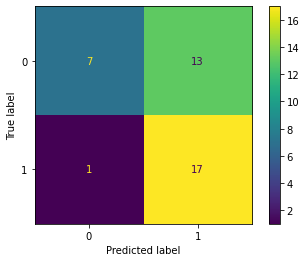

In [18]:
knn_model = KNeighborsClassifier(n_neighbors=19, weights='distance', algorithm='brute', leaf_size=29, p=2)
knn_model.fit(X_train, y_train)

y_predict_knn = knn_model.predict(X_test)
eval_results(y_test, y_predict_knn, knn_model)

The **KNN model** has a **accuracy** of **63%** on test data. However, the final predictons contains large number of false positives (For a large number of datapoints belonging to unhappy class (class 0), the model predicts that they belong to happy class (class 1)) indicating the model's bias towards class 1.

<font size="4"> 5. Logistic Regression</font>

F1 Score:  0.5365853658536586
Accuracy of the model on test data :  0.5
[15 23]
              precision    recall  f1-score   support

           0       0.53      0.40      0.46        20
           1       0.48      0.61      0.54        18

    accuracy                           0.50        38
   macro avg       0.51      0.51      0.50        38
weighted avg       0.51      0.50      0.49        38



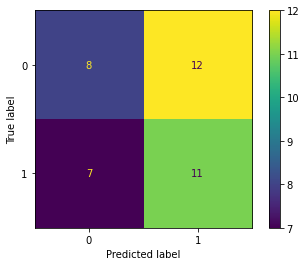

In [19]:
# logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_pred_lg = log_reg.predict(X_test)

eval_results(y_test, y_pred_lg, log_reg)

The **Logisitic Regression model** performs poorly with an **accuracy** of **50%**. The model is also biased towards predicting more examples belonging to class 1 compared to class 0.

<font size="4"><b>Feature Selection</b></font>

In [20]:
# Feature Selection
# Select K best feature (Univariate Feature Selection) with chi squared error
k_best = SelectKBest(score_func=chi2, k=5).fit(data, target)
feature_score = pd.DataFrame({'Questions':list(feature_dict.values()),'Scores':k_best.scores_ })
print(feature_score)                              

                                  Questions    Scores
0           The order was delivered on time  1.449041
1  Contents of the order were as I expected  0.036161
2   Ordered everything they wanted to order  0.900104
3         Good price was paid for the order  0.106194
4                  Satisfied with the order  2.273286
5                The app made ordering easy  0.541070


In [21]:
# Recursive Feature Elimination (RFE)
"""
model = RandomForestClassifier(random_state = 42)
rfe = RFE(model, n_features_to_select=3)
rfe = rfe.fit(full_data, df['Y'])
rfe_mask = rfe.get_support()
rfe_features = [] 
for bol, feature in zip(rfe_mask, full_data.columns):
    if bol:
        rfe_features.append(feature)
print("The best features after RFE are:", rfe_features)
"""

'\nmodel = RandomForestClassifier(random_state = 42)\nrfe = RFE(model, n_features_to_select=3)\nrfe = rfe.fit(full_data, df[\'Y\'])\nrfe_mask = rfe.get_support()\nrfe_features = [] \nfor bol, feature in zip(rfe_mask, full_data.columns):\n    if bol:\n        rfe_features.append(feature)\nprint("The best features after RFE are:", rfe_features)\n'

In [22]:
# From the feature selection step, we select the best features with high scores and train new models.

data = df.drop(['Y', 'X2', 'X4', 'X6'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=42)
print("Size of our training data: ", X_train.shape)
print("Target values of training data: ", X_test.shape)
print("Size of our testing data: ", y_train.shape)
print("Target values of testing data: ", y_test.shape)
print("\n")
print("The data contains {} examples belonging to class 0 (unhappy) and {} examples belonging to class 1 (happy)."
      .format(np.bincount(target)[0], np.bincount(target)[1]))
print("Trainig data contains {} examples belonging to class 0 (unhappy) and {} examples belonging to class 1 (happy)."
      .format(np.bincount(y_train)[0], np.bincount(y_train)[1]))
print("Testing data contains {} examples belonging to class 0 (unhappy) and {} examples belonging to class 1 (happy)."
      .format(np.bincount(y_test)[0], np.bincount(y_test)[1]))

Size of our training data:  (88, 3)
Target values of training data:  (38, 3)
Size of our testing data:  (88,)
Target values of testing data:  (38,)


The data contains 57 examples belonging to class 0 (unhappy) and 69 examples belonging to class 1 (happy).
Trainig data contains 37 examples belonging to class 0 (unhappy) and 51 examples belonging to class 1 (happy).
Testing data contains 20 examples belonging to class 0 (unhappy) and 18 examples belonging to class 1 (happy).


Random Forest model was selected because its performance was better than the other other models that were tested.

F1 Score:  0.7499999999999999
Accuracy of the model on test data :  0.7368421052631579
[16 22]
              precision    recall  f1-score   support

           0       0.81      0.65      0.72        20
           1       0.68      0.83      0.75        18

    accuracy                           0.74        38
   macro avg       0.75      0.74      0.74        38
weighted avg       0.75      0.74      0.74        38



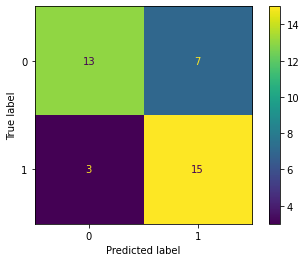

In [23]:
# Random forest classifier (ensemble learning)
rfc = RandomForestClassifier(n_estimators=6, random_state=42)
rfc.fit(X_train, y_train)

y_predict_rfc = rfc.predict(X_test)

eval_results(y_test, y_predict_rfc, rfc)

The model's accuracy increases to **73.6%** when we select the three best features (X1, X3, X5).